<a href="https://colab.research.google.com/github/IronZiiz/computing_physics_methods/blob/main/Aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

## Previous Defs

In [180]:
def f(x):
  return x**2 - 4
def df(x):
  return 2*x

In [181]:
#Implementação da bisseção
def bissecao_trajetoria(a, b, tol=1e-6, max_iter=100):
  xs=[]
  if f(a)*f(b) >= 0:
    raise ValueError("f(a) e f(b) devem ter sinais opostos")
  for _ in range(max_iter):
    c = (a+b)/2
    xs.append(c)
    if abs(f(c)) < tol or (b-a)/2 < tol:
      break
    if f(a)*f(c) < 0:
      b = c
    else:
      a = c
  return xs

#Implementação de Newton-Raphson
def newton_raphson_trajetoria(x0, tol=1e-6, max_iter=100):
  xs = [x0]
  x = x0
  for _ in range(max_iter):
    fx = f(x)
    dfx = df(x)
    if abs(dfx) < 1e-10:
      break
    x_new = x - fx/dfx
    xs.append(x_new)
    if abs(x_new - x) < tol:
      break
    x = x_new
  return xs

## Def Trajectory

In [182]:
#Obter trajetórias das raízes positivas
traj_bissecao = bissecao_trajetoria(1,4)
traj_newton = newton_raphson_trajetoria(3)
print(traj_bissecao)
print(traj_newton)

[2.5, 1.75, 2.125, 1.9375, 2.03125, 1.984375, 2.0078125, 1.99609375, 2.001953125, 1.9990234375, 2.00048828125, 1.999755859375, 2.0001220703125, 1.99993896484375, 2.000030517578125, 1.9999847412109375, 2.0000076293945312, 1.9999961853027344, 2.000001907348633, 1.9999990463256836, 2.000000476837158, 1.999999761581421]
[3, 2.1666666666666665, 2.0064102564102564, 2.0000102400262145, 2.000000000026214, 2.0]


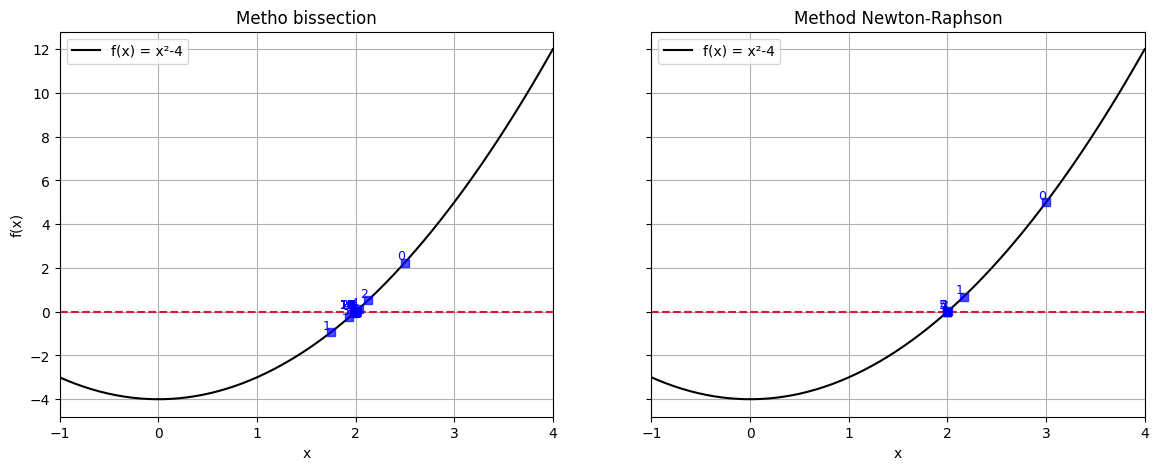

In [183]:
#Gráficos lado a lado com rótulos em cada ponto mostrando a ordem das iterações

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

#Valores da função
x_vals = np.linspace(-4, 4, 400)
y_vals = f(x_vals)

#Bisseção
axes[0].plot(x_vals, y_vals, label='f(x) = x²-4', color='black')
axes[0].axhline(0, color='crimson', linestyle='--')
axes[0].plot(traj_bissecao, [f(x) for x in traj_bissecao], 's', color='blue', alpha=0.7)
for i, x in enumerate(traj_bissecao):
  axes[0].text(x, f(x), f'{i}', fontsize=9, ha='right', va='bottom', color='blue')
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Metho bissection')
axes[0].set_xlim(-1, 4)
axes[0].legend()
axes[0].grid(True)

#Newton-Raphson
axes[1].plot(x_vals, y_vals, label='f(x) = x²-4', color='black')
axes[1].axhline(0, color='crimson', linestyle='--')
axes[1].plot(traj_newton, [f(x) for x in traj_newton], 's', color='blue', alpha=0.7)
for i, x in enumerate(traj_newton):
  axes[1].text(x, f(x), f'{i}', fontsize=9, ha='right', va='bottom', color='blue')
axes[1].set_title('Method Newton-Raphson')
axes[1].set_xlabel('x')
axes[1].set_xlim(-1, 4)
axes[1].legend()
axes[1].grid(True)



In [184]:
root_scalar(f,x0 = 1)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 2.0
         method: newton

In [185]:
root_scalar( lambda x: x**2 - 4, x0 = 1)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 2.0
         method: newton

## Function by def and lambda

In [186]:
def f(x,a,b):
  return a*x**2 + b
root_scalar(f,args = (1,-4),x0=1)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 2.0
         method: newton

## functions Intersection

In [202]:

def g(x):
    return 0.2 * x

In [203]:
def f(x):
    return np.cos(x)


In [204]:
def h(x):
    return f(x) - g(x)

In [205]:
h(-3)
h(3)

np.float64(-1.5899924966004455)

In [209]:
root1 = root_scalar(h, bracket=(-3, -1))
root2 = root_scalar(h, bracket=(1.0, 5))
print("Raiz 1:", root1.root)
print("Raiz 2:", root2.root)

Raiz 1: -1.977383029328841
Raiz 2: 1.306440008369511


## Plot the functions

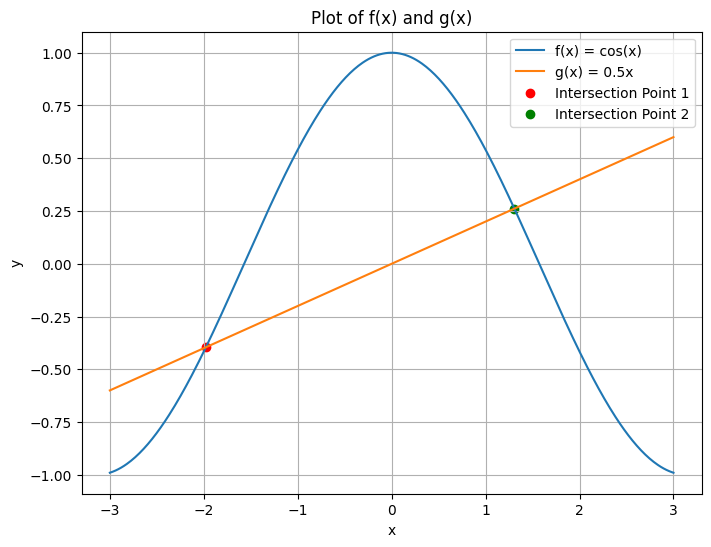

In [210]:

# Plot g(x) and f(x)
x_vals = np.linspace(-3, 3, 400)  # Adjust the range as needed
y_vals_f = f(x_vals)
y_vals_g = g(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals_f, label='f(x) = cos(x)')
plt.plot(x_vals, y_vals_g, label='g(x) = 0.5x')

# Mark the intersection points
plt.scatter(root1.root, g(root1.root), color='red', label='Intersection Point 1')
plt.scatter(root2.root, g(root2.root), color='green', label='Intersection Point 2')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x) and g(x)')
plt.legend()
plt.grid(True)
plt.show()


## gradient descent method

In [ ]:
def gradiente_descendant(x0, eta = 0.01, max_iter = 100, tol = 1e-6):
  x = x0
  traj = [x]
  for _ in range(max_iter):
    grad = df(x)
    if abs(grad) < tol:
      break
    x = x -eta *df(x)
    traj.append(x)
  return traj

In [ ]:
def f(x):
  return x**2 - 1


In [ ]:
# first setp
x0 = 2.5

traj = gradiente_descendant(x0, eta = 0.01, max_iter = 100)

# set of function
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

# plot
figure = plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x²-1', color='black')
for i, x in enumerate(traj):
  plt.plot(x,f(x),'bo')
  plt.text(x, f(x), f'{i}', fontsize=9, ha='right', va='bottom', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Trajectory')
